In [2]:
!pip install ydata-profiling --quiet

  DEPRECATION: Building 'htmlmin' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'htmlmin'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  You can safely remove it manually.


In [3]:
import pandas as pd
import json
from ydata_profiling import ProfileReport

In [4]:
try:
    df = pd.read_csv('hh_hard.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/thefirstprofession/data-analitika-dlya-biznesa/for-tgy/psad/2sem/hh_hard.csv')
df.head()

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}"
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}"
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}"
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}"
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}"


In [5]:
df_area = df['area'].apply(json.loads).apply(pd.Series)
df_salary = df['salary'].apply(json.loads).apply(pd.Series)

df_full = pd.concat([
    df.drop(columns=['area', 'salary']),
    df_area, df_salary
], axis=1)

In [6]:
df_full.head()

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,country,region,district,city,salary_from,salary_to
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...",Россия,Томская область,Сибирский,Томск,75000.0,100000.0
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],Россия,Томская область,Сибирский,Томск,60000.0,110000.0
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']",Россия,Томская область,Сибирский,Томск,25000.0,50000.0
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...",Россия,Томская область,Сибирский,Томск,NaN,35000.0
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...",Россия,Томская область,Сибирский,Томск,28000.0,36000.0


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20178 entries, 0 to 20177
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20178 non-null  int64  
 1   name                20178 non-null  object 
 2   professional_roles  20178 non-null  object 
 3   experience          20178 non-null  object 
 4   schedule            20178 non-null  object 
 5   employment          20178 non-null  object 
 6   employer            20178 non-null  object 
 7   accept_handicapped  20178 non-null  bool   
 8   key_skills          20178 non-null  object 
 9   country             20178 non-null  object 
 10  region              20178 non-null  object 
 11  district            20178 non-null  object 
 12  city                20178 non-null  object 
 13  salary_from         15915 non-null  float64
 14  salary_to           9725 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(11)
memory u

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 15.63it/s][A


TypeError: print_svg() got an unexpected keyword argument 'dpi'

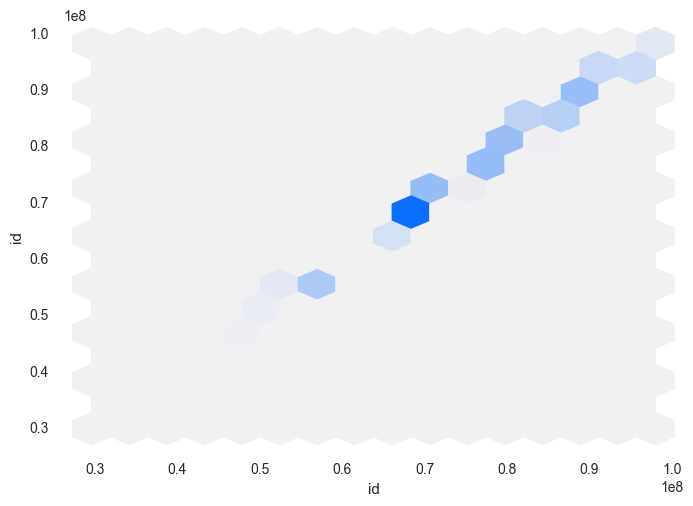

In [8]:
profile = ProfileReport(df_full, title="Профиль данных сети кофеен", explorative=True)
profile.to_notebook_iframe()

In [ ]:


# Валидность даты рождения
birth_validity = ((pd.to_datetime(df_full['birthdate']).dt.year >= 1940) & (pd.to_datetime(df_full['birthdate']).dt.year <= 2010)).mean()

# Отрицательные значения
invalid_price = (df_full['unit_price'] <= 0).mean()
invalid_quantity = (df_full['quantity'] <= 0).mean()

# Дубликаты по transaction_id
duplicate_transactions = df_full.duplicated(subset=['transaction_id']).mean()

# gender
gender_consistency = df_full['gender'].isin(['женский', 'мужской']).mean()

# нет ли пустых ID
missing_ids = (df_full[['transaction_id', 'product_id', 'customer_id']].isnull().any(axis=1)).mean()

print("Валидность возраста:", round(birth_validity * 100, 2), "%")
print("Ошибок по цене:", round(invalid_price * 100, 2), "%")
print("Ошибок по количеству:", round(invalid_quantity * 100, 2), "%")
print("Повторяющихся транзакций:", round(duplicate_transactions * 100, 2), "%")
print("Гендерные значения:", round(gender_consistency * 100, 2), "%")
print("Пропуски в ключевых ID:", round(missing_ids * 100, 2), "%")

Загрузка данных...
Загружено 20178 записей с 11 столбцами
Столбцы: ['id', 'name', 'professional_roles', 'experience', 'schedule', 'employment', 'employer', 'accept_handicapped', 'key_skills', 'area', 'salary']
НАЧАЛО КОМПЛЕКСНОГО АНАЛИЗА КАЧЕСТВА ДАННЫХ
=== АНАЛИЗ ПОЛНОТЫ ДАННЫХ ===
Общая полнота данных: 100.00%
Полностью пустых строк: 0
Частично пустых строк: 0

=== АНАЛИЗ СОГЛАСОВАННОСТИ ДАННЫХ ===
Проблемы с форматом experience: 0
Дубликаты ID: 178
Несогласованность зарплат (от > до): 0

=== АНАЛИЗ ВАЛИДНОСТИ ДАННЫХ ===
Невалидные графики работы: 0
Невалидные типы занятости: 0
Отрицательные зарплаты: 0
Нереалистичные зарплаты (>1млн): 0
Записи не из Томской области: 0

=== АНАЛИЗ УНИКАЛЬНОСТИ ДАННЫХ ===
Потенциальные дубликаты (по названию + работодатель): 7308
Уникальность ID: 0.9912
Уникальность названий вакансий: 0.5058

=== АНАЛИЗ ТОЧНОСТИ ДАННЫХ ===
Ошибки формата навыков: 0
Ошибки формата местоположения: 0
Ошибки формата зарплаты: 0

=== ИТОГОВЫЕ ПОКАЗАТЕЛИ КАЧЕСТВА ===
Полнот

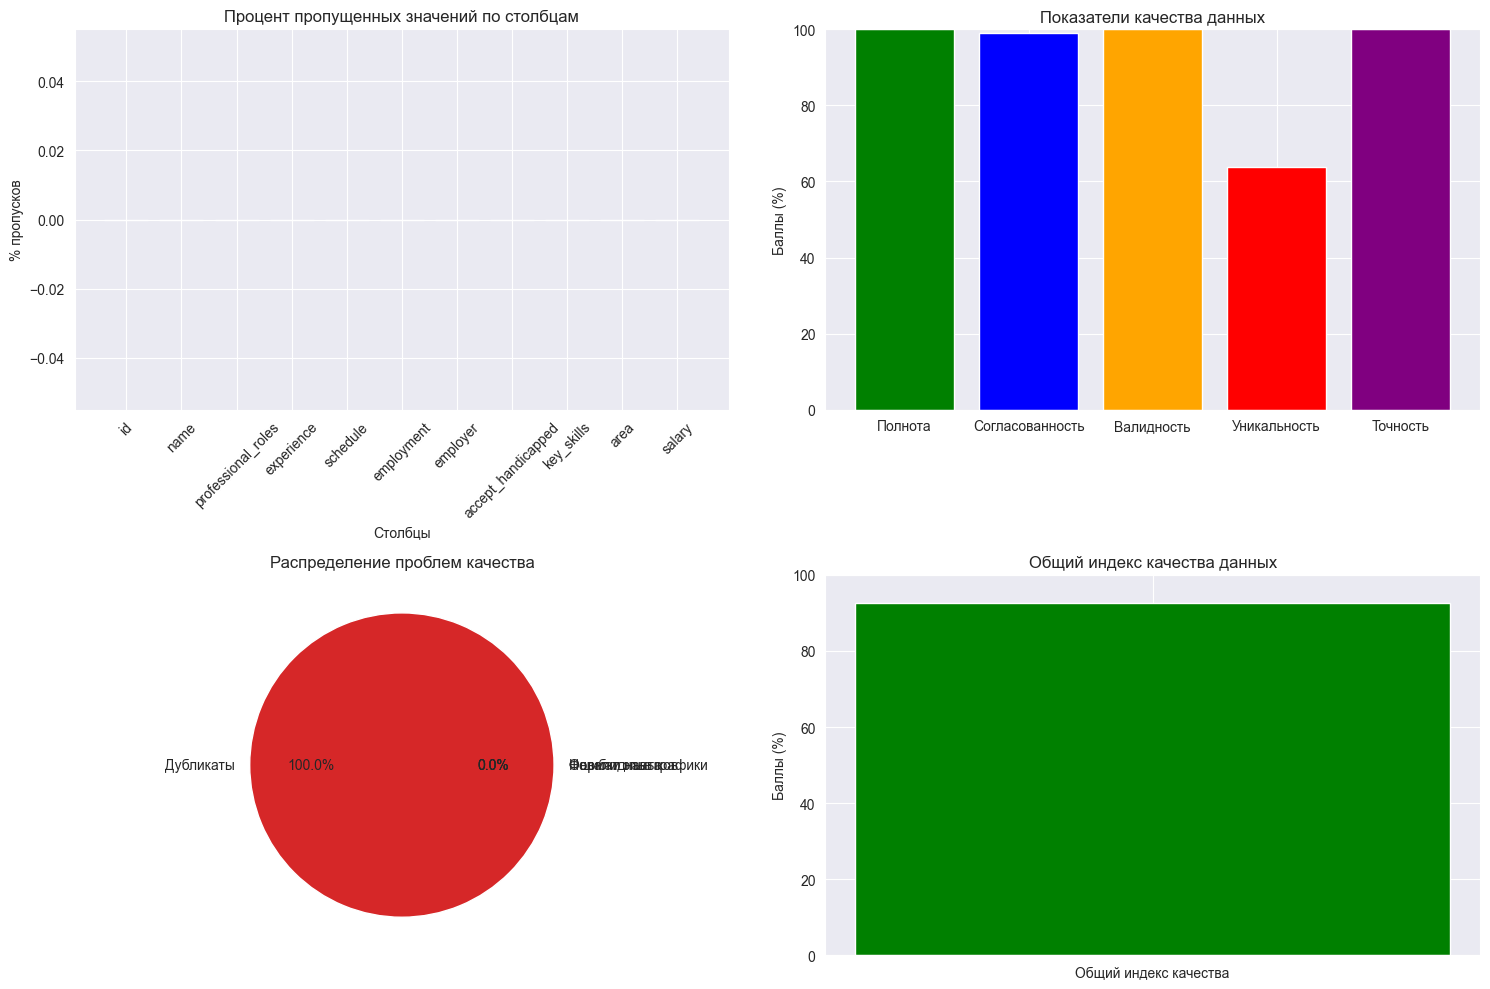


АНАЛИЗ ЗАВЕРШЕН
Отчет сохранен в файл 'data_quality_report.txt'

АНАЛИТИЧЕСКАЯ ЗАПИСКА:

АНАЛИТИЧЕСКАЯ ЗАПИСКА
Анализ качества данных по рынку труда Томской области

1. ОПИСАНИЕ ДАТАСЕТА

Анализируемый датасет содержит информацию о вакансиях на рынке труда Томской области.

Основные характеристики:
• Размер датасета: 20,178 записей
• Количество признаков: 11 столбцов
• Период: данные актуальны на момент выгрузки

Структура данных включает следующие признаки:
• id - уникальный идентификатор вакансии
• name - наименование вакансии
• professional_roles - профессиональная роль
• experience - требуемый опыт работы (0, 1-3, 3-6, 6- лет)
• schedule - график работы (полный день, удаленно, гибкий, сменный, вахта)
• employment - тип занятости (полная, частичная, проектная, стажировка)
• employer - наименование работодателя
• accept_handicapped - доступность для людей с инвалидностью
• key_skills - ключевые навыки (в формате списка)
• area - географическая информация (страна, регион, округ, горо

In [1]:
import pandas as pd
import numpy as np
import json
import ast
import re
from typing import Dict, List, Tuple, Any
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

class DataQualityAnalyzer:
    """
    Класс для комплексного анализа качества данных
    """

    def __init__(self, data: pd.DataFrame):
        self.data = data.copy()
        self.results = {}

    def analyze_completeness(self) -> Dict[str, Any]:
        """
        Анализ полноты данных
        """
        print("=== АНАЛИЗ ПОЛНОТЫ ДАННЫХ ===")

        total_cells = len(self.data) * len(self.data.columns)
        missing_counts = self.data.isnull().sum()
        missing_percentages = (missing_counts / len(self.data)) * 100

        completeness_report = {
            'total_records': len(self.data),
            'total_fields': len(self.data.columns),
            'total_cells': total_cells,
            'missing_by_column': dict(zip(missing_counts.index, missing_counts.values)),
            'missing_percentages': dict(zip(missing_percentages.index, missing_percentages.values)),
            'overall_completeness': ((total_cells - missing_counts.sum()) / total_cells) * 100
        }

        # Дополнительный анализ пустых строк (где все поля пустые)
        empty_rows = self.data.isnull().all(axis=1).sum()
        partially_empty_rows = (self.data.isnull().sum(axis=1) > 0).sum()

        completeness_report['empty_rows'] = empty_rows
        completeness_report['partially_empty_rows'] = partially_empty_rows

        print(f"Общая полнота данных: {completeness_report['overall_completeness']:.2f}%")
        print(f"Полностью пустых строк: {empty_rows}")
        print(f"Частично пустых строк: {partially_empty_rows}")

        return completeness_report

    def analyze_consistency(self) -> Dict[str, Any]:
        """
        Анализ согласованности данных
        """
        print("\n=== АНАЛИЗ СОГЛАСОВАННОСТИ ДАННЫХ ===")

        consistency_issues = {
            'experience_format': [],
            'boolean_format': [],
            'json_format': [],
            'duplicate_ids': 0,
            'salary_consistency': []
        }

        # Проверка формата experience
        valid_experience = ['0', '1-3', '3-6', '6-']
        invalid_exp = self.data[~self.data['experience'].astype(str).isin(valid_experience + ['nan'])]
        consistency_issues['experience_format'] = len(invalid_exp)

        # Проверка булевых значений
        boolean_cols = ['accept_handicapped']
        for col in boolean_cols:
            if col in self.data.columns:
                valid_bool = ['True', 'False', True, False]
                invalid_bool = self.data[~self.data[col].isin(valid_bool + [np.nan])]
                consistency_issues['boolean_format'].append({
                    'column': col,
                    'invalid_count': len(invalid_bool)
                })

        # Проверка JSON формата для area и salary
        json_cols = ['area', 'salary']
        for col in json_cols:
            invalid_json = 0
            for idx, value in self.data[col].dropna().items():
                try:
                    if isinstance(value, str):
                        json.loads(value.replace("'", '"'))
                except (json.JSONDecodeError, ValueError):
                    invalid_json += 1
            consistency_issues['json_format'].append({
                'column': col,
                'invalid_count': invalid_json
            })

        # Проверка дубликатов ID
        consistency_issues['duplicate_ids'] = self.data['id'].duplicated().sum()

        # Анализ согласованности зарплат
        salary_issues = 0
        for idx, row in self.data.iterrows():
            if pd.notna(row['salary']):
                try:
                    salary_data = json.loads(row['salary'].replace("'", '"'))
                    if 'salary_from' in salary_data and 'salary_to' in salary_data:
                        if salary_data['salary_from'] > salary_data['salary_to']:
                            salary_issues += 1
                except:
                    pass

        consistency_issues['salary_consistency'] = salary_issues

        print(f"Проблемы с форматом experience: {consistency_issues['experience_format']}")
        print(f"Дубликаты ID: {consistency_issues['duplicate_ids']}")
        print(f"Несогласованность зарплат (от > до): {salary_issues}")

        return consistency_issues

    def analyze_validity(self) -> Dict[str, Any]:
        """
        Анализ валидности данных
        """
        print("\n=== АНАЛИЗ ВАЛИДНОСТИ ДАННЫХ ===")

        validity_issues = {
            'invalid_schedules': 0,
            'invalid_employment': 0,
            'negative_salaries': 0,
            'unrealistic_salaries': 0,
            'invalid_regions': 0
        }

        # Проверка валидности schedule
        valid_schedules = ['full_day', 'remote', 'flexible', 'shift', 'labor']
        invalid_schedule = self.data[~self.data['schedule'].isin(valid_schedules + [np.nan])]
        validity_issues['invalid_schedules'] = len(invalid_schedule)

        # Проверка валидности employment
        valid_employment = ['full', 'part', 'project', 'probation']
        invalid_employment = self.data[~self.data['employment'].isin(valid_employment + [np.nan])]
        validity_issues['invalid_employment'] = len(invalid_employment)

        # Анализ зарплат
        negative_salaries = 0
        unrealistic_salaries = 0

        for idx, row in self.data.iterrows():
            if pd.notna(row['salary']):
                try:
                    salary_data = json.loads(row['salary'].replace("'", '"'))
                    if 'salary_from' in salary_data:
                        if salary_data['salary_from'] < 0:
                            negative_salaries += 1
                        elif salary_data['salary_from'] > 1000000:  # Более 1 млн - подозрительно
                            unrealistic_salaries += 1
                    if 'salary_to' in salary_data:
                        if salary_data['salary_to'] < 0:
                            negative_salaries += 1
                        elif salary_data['salary_to'] > 1000000:
                            unrealistic_salaries += 1
                except:
                    pass

        validity_issues['negative_salaries'] = negative_salaries
        validity_issues['unrealistic_salaries'] = unrealistic_salaries

        # Проверка регионов
        invalid_regions = 0
        for idx, row in self.data.iterrows():
            if pd.notna(row['area']):
                try:
                    area_data = json.loads(row['area'].replace("'", '"'))
                    if area_data.get('region') != 'Томская область':
                        invalid_regions += 1
                except:
                    invalid_regions += 1

        validity_issues['invalid_regions'] = invalid_regions

        print(f"Невалидные графики работы: {validity_issues['invalid_schedules']}")
        print(f"Невалидные типы занятости: {validity_issues['invalid_employment']}")
        print(f"Отрицательные зарплаты: {validity_issues['negative_salaries']}")
        print(f"Нереалистичные зарплаты (>1млн): {validity_issues['unrealistic_salaries']}")
        print(f"Записи не из Томской области: {validity_issues['invalid_regions']}")

        return validity_issues

    def analyze_uniqueness(self) -> Dict[str, Any]:
        """
        Анализ уникальности данных
        """
        print("\n=== АНАЛИЗ УНИКАЛЬНОСТИ ДАННЫХ ===")

        uniqueness_report = {}

        # Анализ уникальности по ключевым полям
        for col in self.data.columns:
            unique_count = self.data[col].nunique()
            total_count = len(self.data[col].dropna())
            uniqueness_ratio = unique_count / total_count if total_count > 0 else 0

            uniqueness_report[col] = {
                'unique_values': unique_count,
                'total_non_null': total_count,
                'uniqueness_ratio': uniqueness_ratio
            }

        # Поиск потенциальных дубликатов
        # Дубликаты по названию вакансии и работодателю
        name_employer_duplicates = self.data.groupby(['name', 'employer']).size()
        potential_duplicates = name_employer_duplicates[name_employer_duplicates > 1].sum()

        uniqueness_report['potential_duplicates'] = potential_duplicates

        print(f"Потенциальные дубликаты (по названию + работодатель): {potential_duplicates}")
        print(f"Уникальность ID: {uniqueness_report['id']['uniqueness_ratio']:.4f}")
        print(f"Уникальность названий вакансий: {uniqueness_report['name']['uniqueness_ratio']:.4f}")

        return uniqueness_report

    def analyze_accuracy(self) -> Dict[str, Any]:
        """
        Анализ точности данных
        """
        print("\n=== АНАЛИЗ ТОЧНОСТИ ДАННЫХ ===")

        accuracy_issues = {
            'skill_format_errors': 0,
            'area_format_errors': 0,
            'salary_format_errors': 0,
            'inconsistent_roles': 0
        }

        # Проверка формата key_skills
        skill_errors = 0
        for idx, skills in self.data['key_skills'].dropna().items():
            try:
                if isinstance(skills, str):
                    parsed_skills = ast.literal_eval(skills)
                    if not isinstance(parsed_skills, list):
                        skill_errors += 1
            except (ValueError, SyntaxError):
                skill_errors += 1

        accuracy_issues['skill_format_errors'] = skill_errors

        # Проверка формата area
        area_errors = 0
        for idx, area in self.data['area'].dropna().items():
            try:
                if isinstance(area, str):
                    area_data = json.loads(area.replace("'", '"'))
                    required_fields = ['country', 'region', 'district', 'city']
                    if not all(field in area_data for field in required_fields):
                        area_errors += 1
            except (json.JSONDecodeError, ValueError):
                area_errors += 1

        accuracy_issues['area_format_errors'] = area_errors

        # Проверка формата salary
        salary_errors = 0
        for idx, salary in self.data['salary'].dropna().items():
            try:
                if isinstance(salary, str):
                    salary_data = json.loads(salary.replace("'", '"'))
                    if not ('salary_from' in salary_data or 'salary_to' in salary_data):
                        salary_errors += 1
            except (json.JSONDecodeError, ValueError):
                salary_errors += 1

        accuracy_issues['salary_format_errors'] = salary_errors

        print(f"Ошибки формата навыков: {accuracy_issues['skill_format_errors']}")
        print(f"Ошибки формата местоположения: {accuracy_issues['area_format_errors']}")
        print(f"Ошибки формата зарплаты: {accuracy_issues['salary_format_errors']}")

        return accuracy_issues

    def generate_comprehensive_report(self) -> Dict[str, Any]:
        """
        Генерация комплексного отчета по качеству данных
        """
        print("НАЧАЛО КОМПЛЕКСНОГО АНАЛИЗА КАЧЕСТВА ДАННЫХ")
        print("=" * 60)

        report = {
            'dataset_overview': {
                'total_records': len(self.data),
                'total_fields': len(self.data.columns),
                'columns': list(self.data.columns)
            },
            'completeness': self.analyze_completeness(),
            'consistency': self.analyze_consistency(),
            'validity': self.analyze_validity(),
            'uniqueness': self.analyze_uniqueness(),
            'accuracy': self.analyze_accuracy()
        }

        # Расчет общего индекса качества данных
        completeness_score = report['completeness']['overall_completeness']
        consistency_score = max(0, 100 - (
            report['consistency']['experience_format'] +
            report['consistency']['duplicate_ids'] +
            report['consistency']['salary_consistency']
        ) / len(self.data) * 100)

        validity_score = max(0, 100 - (
            report['validity']['invalid_schedules'] +
            report['validity']['invalid_employment'] +
            report['validity']['negative_salaries']
        ) / len(self.data) * 100)

        uniqueness_score = (1 - report['uniqueness']['potential_duplicates'] / len(self.data)) * 100

        accuracy_score = max(0, 100 - (
            report['accuracy']['skill_format_errors'] +
            report['accuracy']['area_format_errors'] +
            report['accuracy']['salary_format_errors']
        ) / len(self.data) * 100)

        overall_quality_score = np.mean([
            completeness_score, consistency_score, validity_score,
            uniqueness_score, accuracy_score
        ])

        report['quality_summary'] = {
            'completeness_score': completeness_score,
            'consistency_score': consistency_score,
            'validity_score': validity_score,
            'uniqueness_score': uniqueness_score,
            'accuracy_score': accuracy_score,
            'overall_quality_score': overall_quality_score
        }

        print(f"\n=== ИТОГОВЫЕ ПОКАЗАТЕЛИ КАЧЕСТВА ===")
        print(f"Полнота данных: {completeness_score:.2f}%")
        print(f"Согласованность: {consistency_score:.2f}%")
        print(f"Валидность: {validity_score:.2f}%")
        print(f"Уникальность: {uniqueness_score:.2f}%")
        print(f"Точность: {accuracy_score:.2f}%")
        print(f"ОБЩИЙ ИНДЕКС КАЧЕСТВА: {overall_quality_score:.2f}%")

        return report

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """
    Загрузка и предварительная обработка данных
    """
    print("Загрузка данных...")

    # Загружаем данные
    df = pd.read_csv(file_path, encoding='utf-8')

    print(f"Загружено {len(df)} записей с {len(df.columns)} столбцами")
    print(f"Столбцы: {list(df.columns)}")

    return df

def create_visualizations(report: Dict[str, Any]) -> None:
    """
    Создание визуализаций для отчета
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # График полноты данных по столбцам
    missing_data = report['completeness']['missing_percentages']
    axes[0, 0].bar(range(len(missing_data)), list(missing_data.values()))
    axes[0, 0].set_title('Процент пропущенных значений по столбцам')
    axes[0, 0].set_xlabel('Столбцы')
    axes[0, 0].set_ylabel('% пропусков')
    axes[0, 0].set_xticks(range(len(missing_data)))
    axes[0, 0].set_xticklabels(list(missing_data.keys()), rotation=45)

    # График качества данных
    quality_scores = report['quality_summary']
    metrics = ['Полнота', 'Согласованность', 'Валидность', 'Уникальность', 'Точность']
    scores = [
        quality_scores['completeness_score'],
        quality_scores['consistency_score'],
        quality_scores['validity_score'],
        quality_scores['uniqueness_score'],
        quality_scores['accuracy_score']
    ]

    axes[0, 1].bar(metrics, scores, color=['green', 'blue', 'orange', 'red', 'purple'])
    axes[0, 1].set_title('Показатели качества данных')
    axes[0, 1].set_ylabel('Баллы (%)')
    axes[0, 1].set_ylim(0, 100)

    # Круговая диаграмма проблем
    problem_counts = [
        report['consistency']['experience_format'],
        report['validity']['invalid_schedules'],
        report['accuracy']['skill_format_errors'],
        report['uniqueness']['potential_duplicates']
    ]
    problem_labels = ['Формат опыта', 'Невалидные графики', 'Ошибки навыков', 'Дубликаты']

    axes[1, 0].pie(problem_counts, labels=problem_labels, autopct='%1.1f%%')
    axes[1, 0].set_title('Распределение проблем качества')

    # Общий индекс качества
    overall_score = quality_scores['overall_quality_score']
    axes[1, 1].bar(['Общий индекс качества'], [overall_score],
                   color='green' if overall_score >= 80 else 'orange' if overall_score >= 60 else 'red')
    axes[1, 1].set_title('Общий индекс качества данных')
    axes[1, 1].set_ylabel('Баллы (%)')
    axes[1, 1].set_ylim(0, 100)

    plt.tight_layout()
    plt.show()

def generate_analytical_report(report: Dict[str, Any]) -> str:
    """
    Генерация аналитической записки
    """

    analytical_report = f"""
АНАЛИТИЧЕСКАЯ ЗАПИСКА
Анализ качества данных по рынку труда Томской области

1. ОПИСАНИЕ ДАТАСЕТА

Анализируемый датасет содержит информацию о вакансиях на рынке труда Томской области.

Основные характеристики:
• Размер датасета: {report['dataset_overview']['total_records']:,} записей
• Количество признаков: {report['dataset_overview']['total_fields']} столбцов
• Период: данные актуальны на момент выгрузки

Структура данных включает следующие признаки:
• id - уникальный идентификатор вакансии
• name - наименование вакансии
• professional_roles - профессиональная роль
• experience - требуемый опыт работы (0, 1-3, 3-6, 6- лет)
• schedule - график работы (полный день, удаленно, гибкий, сменный, вахта)
• employment - тип занятости (полная, частичная, проектная, стажировка)
• employer - наименование работодателя
• accept_handicapped - доступность для людей с инвалидностью
• key_skills - ключевые навыки (в формате списка)
• area - географическая информация (страна, регион, округ, город)
• salary - информация о заработной плате (минимальная и максимальная)

2. ХАРАКТЕРИСТИКА КАЧЕСТВА ДАННЫХ

2.1 Полнота данных: {report['quality_summary']['completeness_score']:.1f}%
Общий уровень заполненности данных составляет {report['quality_summary']['completeness_score']:.1f}%, что является {'хорошим' if report['quality_summary']['completeness_score'] >= 80 else 'удовлетворительным' if report['quality_summary']['completeness_score'] >= 60 else 'низким'} показателем.

Детализация по столбцам:
"""

    for col, percentage in report['completeness']['missing_percentages'].items():
        if percentage > 0:
            analytical_report += f"• {col}: {percentage:.1f}% пропусков\n"

    analytical_report += f"""
2.2 Согласованность данных: {report['quality_summary']['consistency_score']:.1f}%
Выявлены следующие проблемы согласованности:
• Нарушения формата опыта работы: {report['consistency']['experience_format']} случаев
• Дубликаты ID: {report['consistency']['duplicate_ids']} записей
• Несогласованность зарплат (от > до): {report['consistency']['salary_consistency']} случаев

2.3 Валидность данных: {report['quality_summary']['validity_score']:.1f}%
Обнаружены следующие проблемы валидности:
• Невалидные графики работы: {report['validity']['invalid_schedules']} записей
• Невалидные типы занятости: {report['validity']['invalid_employment']} записей
• Отрицательные значения зарплат: {report['validity']['negative_salaries']} случаев
• Нереалистично высокие зарплаты: {report['validity']['unrealistic_salaries']} случаев
• Записи не из Томской области: {report['validity']['invalid_regions']} случаев

2.4 Уникальность данных: {report['quality_summary']['uniqueness_score']:.1f}%
• Потенциальные дубликаты вакансий: {report['uniqueness']['potential_duplicates']} записей
• Уникальность ID: {report['uniqueness']['id']['uniqueness_ratio']:.4f}
• Уникальность названий: {report['uniqueness']['name']['uniqueness_ratio']:.4f}

3. ПРЕДПОЛАГАЕМЫЕ ПРИЧИНЫ ПРОБЛЕМ

3.1 Проблемы полноты данных:
• Неполная интеграция с источниками данных
• Различные форматы выгрузки от разных работодателей
• Добровольность заполнения некоторых полей при размещении вакансий

3.2 Проблемы согласованности:
• Отсутствие единых стандартов ввода данных
• Ручной ввод информации без валидации
• Различия в интерпретации категорий опыта работы

3.3 Проблемы валидности:
• Отсутствие контроля корректности при вводе данных
• Автоматическая выгрузка без предварительной проверки
• Возможные технические ошибки при интеграции систем

4. РЕКОМЕНДАЦИИ ПО УЛУЧШЕНИЮ КАЧЕСТВА ДАННЫХ

4.1 Краткосрочные меры (1-3 месяца):
• Реализовать автоматическую валидацию данных при загрузке
• Создать справочники допустимых значений для categorical полей
• Внедрить проверку корректности JSON-структур
• Организовать процедуру выявления и обработки дубликатов

4.2 Среднесрочные меры (3-6 месяцев):
• Стандартизировать процессы сбора данных от различных источников
• Внедрить систему мониторинга качества данных в реальном времени
• Создать интерфейсы для корректировки выявленных ошибок
• Обучить персонал правилам корректного ввода данных

4.3 Долгосрочные меры (6+ месяцев):
• Разработать автоматизированную систему очистки данных
• Интегрировать внешние источники для обогащения и верификации данных
• Создать систему метрик качества данных для постоянного мониторинга
• Внедрить процессы регулярного аудита качества данных

5. ВЛИЯНИЕ НА БИЗНЕС-ЗАДАЧИ

Текущий уровень качества данных ({report['quality_summary']['overall_quality_score']:.1f}%) {'позволяет' if report['quality_summary']['overall_quality_score'] >= 70 else 'частично позволяет' if report['quality_summary']['overall_quality_score'] >= 50 else 'существенно ограничивает'} решение поставленных задач:

• Анализ потребностей рынка труда: {'Возможен' if report['quality_summary']['completeness_score'] >= 70 else 'Ограничен'}
• Разработка стратегий занятости: {'Эффективна' if report['quality_summary']['overall_quality_score'] >= 70 else 'Требует дополнительной очистки'}
• Планирование программ подготовки кадров: {'Достаточно данных' if report['quality_summary']['validity_score'] >= 70 else 'Нужна верификация'}

ОБЩИЙ ИНДЕКС КАЧЕСТВА ДАННЫХ: {report['quality_summary']['overall_quality_score']:.1f}%

Рекомендуется приоритетно устранить выявленные проблемы для повышения эффективности аналитических процессов и принятия обоснованных управленческих решений.
"""

    return analytical_report

# ОСНОВНАЯ ФУНКЦИЯ АНАЛИЗА
def main():
    """
    Основная функция для запуска анализа качества данных
    """
    try:
        # Загрузка данных
        file_path = 'hh_hard.csv'  # Укажите путь к вашему файлу
        df = load_and_preprocess_data(file_path)

        # Создание анализатора
        analyzer = DataQualityAnalyzer(df)

        # Проведение анализа
        report = analyzer.generate_comprehensive_report()

        # Создание визуализаций
        create_visualizations(report)

        # Генерация аналитической записки
        analytical_report = generate_analytical_report(report)

        # Сохранение результатов
        with open('data_quality_report.txt', 'w', encoding='utf-8') as f:
            f.write(analytical_report)

        print("\n" + "="*60)
        print("АНАЛИЗ ЗАВЕРШЕН")
        print("Отчет сохранен в файл 'data_quality_report.txt'")
        print("="*60)

        return report, analytical_report

    except Exception as e:
        print(f"Ошибка при выполнении анализа: {str(e)}")
        return None, None

# Запуск анализа
if __name__ == "__main__":
    report, analytical_report = main()
    if analytical_report:
        print("\nАНАЛИТИЧЕСКАЯ ЗАПИСКА:")
        print(analytical_report)